In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import warnings, os

plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

In [ ]:
df.rename({"Annual Income (k$)":"Income",
           "Spending Score (1-100)":"Spending"},
           axis = 1,
           inplace = True)

In [ ]:
df

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
pd.DataFrame(df.dtypes, columns = ['DataType'])

,DataType
CustomerID,int64
Gender,object
Age,int64
Income,int64
Spending,int64


In [ ]:
df.drop("CustomerID", axis = 1, inplace = True)

In [ ]:
pd.DataFrame(df.groupby('Gender').size(), columns=['Count'])

,Count
Gender,
Female,112
Male,88


In [ ]:
fig = px.pie(df, names = "Gender",
             title = "<b>Counts in Gender</b>",
             hole = 0.5,             
            color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

Mes spending and income bye genre

In [ ]:
df.groupby("Gender").agg({'Income':'mean',
                          'Spending': 'mean'}).style.background_gradient()

,Income,Spending
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


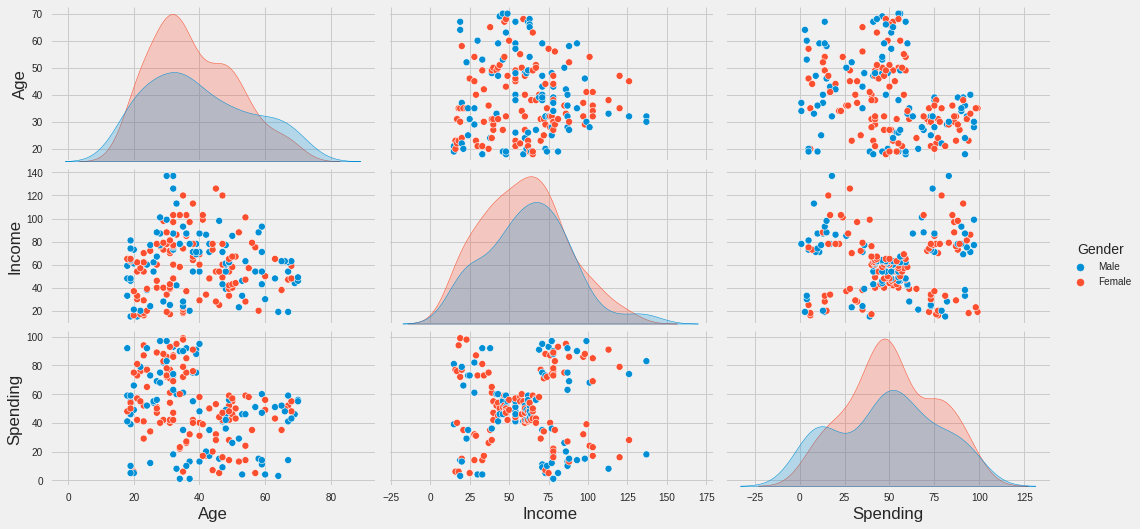

In [ ]:
sns.pairplot(df, hue = "Gender", aspect=2);

In [ ]:
fig = px.histogram(df, "Income",
                   color = "Gender",
                   title="<b>Income Distribution</b>",
                   color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(marker = {"opacity": 0.7})

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [ ]:
fig = px.histogram(df,"Spending",
                   color = "Gender",
                   title="<b>Spending Distribution</b>",
                   color_discrete_sequence=px.colors.sequential.Sunset_r)

fig.update_traces(marker = {"opacity": 0.7})

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [ ]:
age_income_df = df[['Age','Income']]
income_spending_df = df[['Income','Spending']]

In [ ]:
age_income_df

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17
...,...,...
195,35,120
196,45,126
197,32,126
198,32,137


EDA end

Start with Clustering

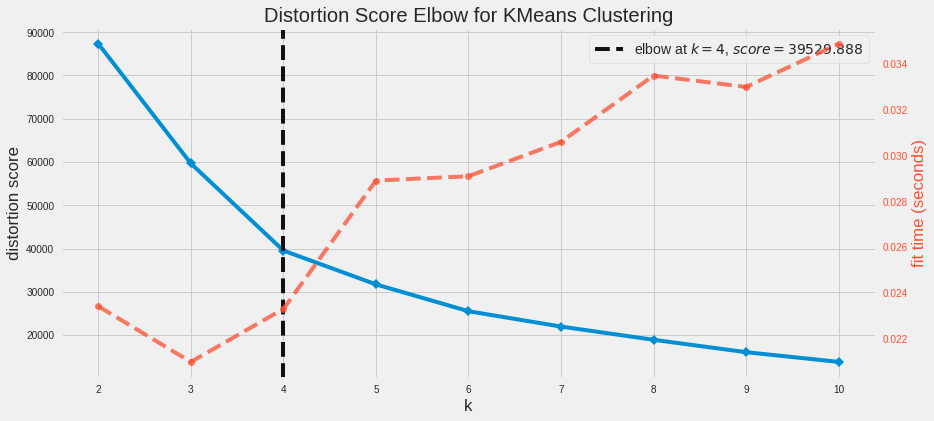

In [ ]:
plt.figure(figsize = (13,6))
elbow_visualizer = KElbowVisualizer(KMeans(), k = 10)
elbow_visualizer.fit(age_income_df)
elbow_visualizer.show()

The optimate number of cluster for this dataset (age_income_df)

In [ ]:
model = KMeans(n_clusters = 4)
model.fit(age_income_df)

KMeans(n_clusters=4)

In [ ]:
cluster_num = model.fit_predict(age_income_df)
cluster_num

array([3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
age_income_df

,Age,Income,Cluster_No
0,19,15,1
1,21,15,1
2,20,16,1
3,23,16,1
4,31,17,1
...,...,...,...
195,35,120,3
196,45,126,3
197,32,126,3
198,32,137,3


In [ ]:
age_income_df['Cluster_No'] = cluster_num

age_income_df.head()

,Age,Income,Cluster_No
0,19,15,3
1,21,15,3
2,20,16,3
3,23,16,3
4,31,17,3


In [ ]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[ 55.66071429,  51.01785714,   1.96428571],
       [ 39.        , 106.5       ,   3.        ],
       [ 31.95890411,  72.95890411,   0.        ],
       [ 29.44680851,  29.21276596,   1.        ]])

In [ ]:
cluster_1 = age_income_df[age_income_df['Cluster_No'] == 0]
cluster_2 = age_income_df[age_income_df['Cluster_No'] == 1]
cluster_3 = age_income_df[age_income_df['Cluster_No'] == 2]
cluster_4 = age_income_df[age_income_df['Cluster_No'] == 3]

In [ ]:
cluster_1

,Age,Income,Cluster_No
8,64,19,0
10,67,19,0
24,54,28,0
30,60,30,0
32,53,33,0
34,49,33,0
40,65,38,0
42,48,39,0
44,49,39,0
46,50,40,0


In [ ]:
cluster_2

,Age,Income,Cluster_No
174,52,88,1
176,58,88,1
178,59,93,1
179,35,93,1
180,37,97,1
181,32,97,1
182,46,98,1
183,29,98,1
184,41,99,1
185,30,99,1


In [ ]:
cluster_3

,Age,Income,Cluster_No
75,26,54,2
78,23,54,2
84,21,54,2
87,22,57,2
88,34,58,2
...,...,...,...
171,28,87,2
172,36,87,2
173,36,87,2
175,30,88,2


In [ ]:
cluster_4

,Age,Income,Cluster_No
0,19,15,3
1,21,15,3
2,20,16,3
3,23,16,3
4,31,17,3
5,22,17,3
6,35,18,3
7,23,18,3
9,30,19,3
11,35,19,3


Visualization

Text(0, 0.5, 'Income')

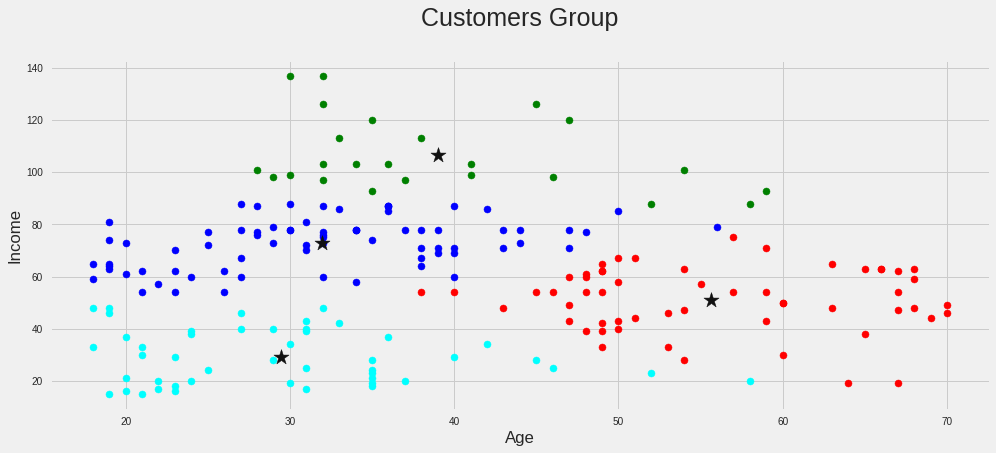

In [ ]:
plt.figure(figsize = (15,6))
plt.title("Customers Group\n", size = 25)
plt.scatter(cluster_1['Age'], cluster_1['Income'], color = 'red')
plt.scatter(cluster_2['Age'], cluster_2['Income'], color = 'green')
plt.scatter(cluster_3['Age'], cluster_3['Income'], color = 'blue')
plt.scatter(cluster_4['Age'], cluster_4['Income'], color = 'cyan')

plt.scatter(cluster_centers[:,0], cluster_centers[:, 1], s = 250, c = 'k', marker='*')

plt.xlabel("Age")
plt.ylabel("Income")

New Predictions

In [ ]:
# A new customer with 45 years and 50k spending

In [ ]:
model.predict([[45,50]])

array([0], dtype=int32)

In [ ]:
# Is in the group 0, the red

Now, income vs spending

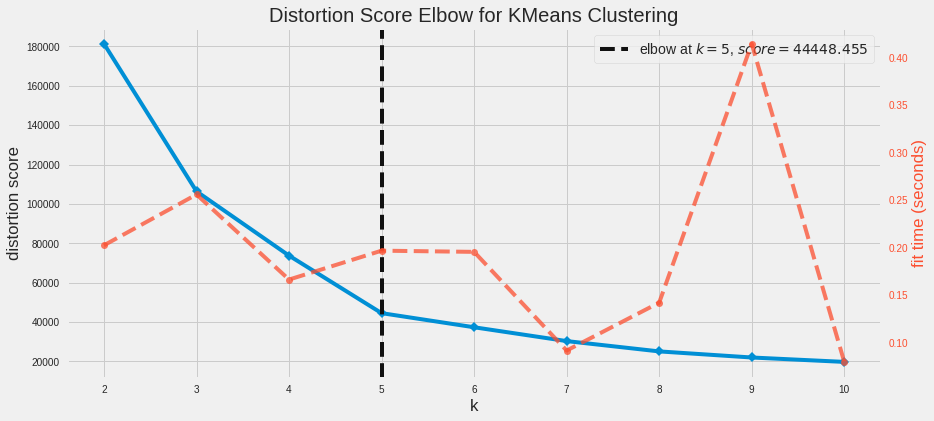

In [ ]:
plt.figure(figsize = (13,6))
elbow_visualizer = KElbowVisualizer(KMeans(), k = 10)
elbow_visualizer.fit(income_spending_df)
elbow_visualizer.show()

In [ ]:
model = KMeans(n_clusters=5)
model.fit(income_spending_df)

KMeans(n_clusters=5)

In [ ]:
income_spending_df['Cluster_No'] = cluster_num

In [ ]:
income_spending_df.head()

,Income,Spending,Cluster_No
0,15,39,1
1,15,81,4
2,16,6,1
3,16,77,4
4,17,40,1


In [ ]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636]])

In [ ]:
cluster_1 = income_spending_df[income_spending_df['Cluster_No'] == 0]
cluster_2 = income_spending_df[income_spending_df['Cluster_No'] == 1]
cluster_3 = income_spending_df[income_spending_df['Cluster_No'] == 2]
cluster_4 = income_spending_df[income_spending_df['Cluster_No'] == 3]
cluster_5 = income_spending_df[income_spending_df['Cluster_No'] == 4]

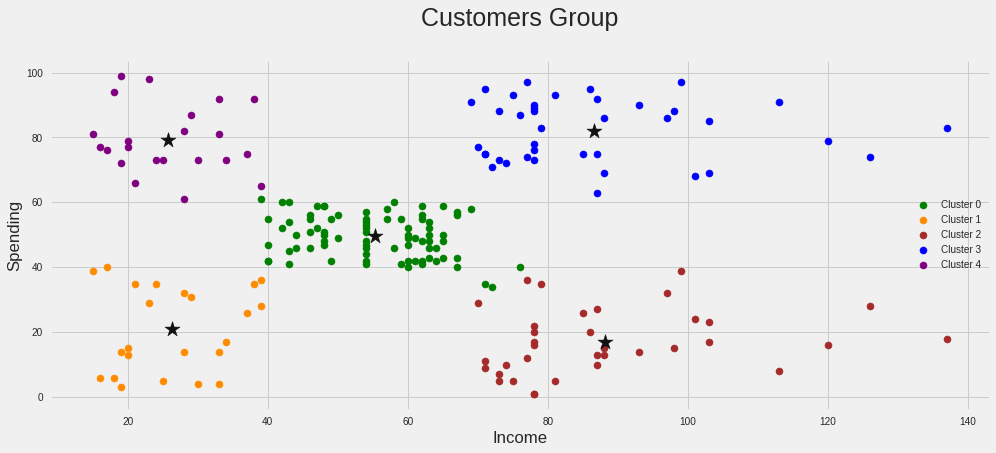

In [ ]:
plt.figure(figsize = (15,6))
plt.title("Customers Group\n", size = 25)
plt.scatter(cluster_1['Income'], cluster_1['Spending'], s=50, color = 'green', label = "Cluster 0")
plt.scatter(cluster_2['Income'], cluster_2['Spending'], s=50, color = 'darkorange', label = "Cluster 1")
plt.scatter(cluster_3['Income'], cluster_3['Spending'], s=50, color = 'brown', label = "Cluster 2")
plt.scatter(cluster_4['Income'], cluster_4['Spending'], s=50, color = 'blue', label = 'Cluster 3')
plt.scatter(cluster_5['Income'], cluster_5['Spending'], s=50, color = 'purple', label = 'Cluster 4')

plt.scatter(cluster_centers[:,0], cluster_centers[:, 1], s = 250, c = 'k', marker='*')

plt.xlabel("Income")
plt.ylabel("Spending")
plt.legend();

Prediction

In [ ]:
model.predict([[20, 20]])

array([1], dtype=int32)

A new customer with 20k income and 20k spending is in the group 1, the yellow

This is how mame customer segmentación with clustering. Thanks for read.